## Tensorflow tutorial
* 텐서플로우를 이용해서 유방암 진단 모델을 만들어 보자
* google colab을 이용해 진행하였음: https://colab.research.google.com/
---

In [1]:
import tensorflow as tf                #ML 백엔드로 사용
from keras.models import Sequential    #ML 프론트엔드로 사용
from keras.layers import Dense
import pandas as pd                    #csv 파일 불러오기에 사용
import numpy as np                     #TF는 numpy 배열로 입력시켜야 함
from google.colab import files         #colab 파일 업로드를 위해 사용
from matplotlib import pyplot as plt   #그래프를 그리기 위해 사용

Using TensorFlow backend.


---
### 유방암 데이터 불러오기
* 위스콘신 유방암 데이터를 이용한다
* 아래 출처에서 다운로드할 수 있으며, 해당 데이터는 train과 valid의 두 파일로 분리되어 있다
* source: https://www.kaggle.com/humbertobrandao/breast-cancer/

In [2]:
#colab에 파일 업로드하기
data = files.upload()

Saving train.csv to train (4).csv


In [0]:
df = pd.read_csv('./train.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,863270,B,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066,0.1199,0.8944,0.8484,9.227,0.003457,0.01047,0.011670,0.005558,0.01251,0.001356,13.290,27.49,85.56,544.1,0.1184,0.19630,0.19370,0.08442,0.2983,0.07185
1,87556202,M,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,0.2796,0.9622,3.5910,25.200,0.008081,0.05122,0.055510,0.018830,0.02545,0.004312,16.080,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701
2,858970,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,0.5158,1.4410,3.3120,34.620,0.007514,0.01099,0.007665,0.008193,0.04183,0.005953,11.020,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
3,909220,B,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898,0.3892,1.0460,2.6440,32.740,0.007976,0.01295,0.016080,0.009046,0.02005,0.002830,15.660,21.58,101.20,750.0,0.1195,0.12520,0.11170,0.07453,0.2725,0.07234
4,9010333,B,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,0.1930,0.06621,0.5381,1.2000,4.2770,30.180,0.010930,0.02899,0.032140,0.015060,0.02837,0.004174,9.981,17.70,65.27,302.0,0.1015,0.12480,0.09441,0.04762,0.2434,0.07431


In [0]:
#seed 설정을 통해 작업 수행시마다 결과가 달라지지 않도록 함
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [0]:
#concave points_mean과 concavity_mean을 이용해 진단 (diagnosis) 에 활용할 것
x = df[['concave points_mean','concavity_mean']].values
y = df['diagnosis'].values

In [0]:
#M = malignant, B = benign 형식으로 분류된 데이터를 1 = malignant, 0 = benign 형식으로 변경
for i in range (len(y)):
  if y[i] == 'M':
    y[i] = 1
  else:
    y[i] = 0

In [8]:
model = Sequential()                                  #선형 회귀분석. 데이터 분류에 주로 사용
model.add(Dense(10,input_dim=2,activation='relu'))    #첫 번째 입력계층. Dense: 노드 개수 10개, 2개 data를 받음
model.add(Dense(30, activation='relu'))               #두 번째 입력계층. Dense: 노드 개수 30개
model.add(Dense(1, activation='sigmoid'))             # 출력계층. 노드 하나로 참/거짓 판별

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
# 평균 제곱 오차 함수를 사용함, 최적화: adam 방식 사용

W0619 05:52:17.426337 140285393495936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0619 05:52:17.432054 140285393495936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 05:52:17.438088 140285393495936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0619 05:52:17.488082 140285393495936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [9]:
model.summary()    #학습모델을 확인할 수 있다

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


In [10]:
tf_model = model.fit(x,y,epochs=30,batch_size=10)
#epochs: 학습 횟수, batch_size: 10개 묶음으로 학습시킴

W0619 05:52:17.663391 140285393495936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0619 05:52:17.762064 140285393495936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/30
284/284 [==============================] - 0s 911us/step - loss: 0.2458 - acc: 0.6937
Epoch 2/30
284/284 [==============================] - 0s 168us/step - loss: 0.2385 - acc: 0.6408
Epoch 3/30
284/284 [==============================] - 0s 153us/step - loss: 0.2318 - acc: 0.6725
Epoch 4/30
284/284 [==============================] - 0s 136us/step - loss: 0.2252 - acc: 0.6408
Epoch 5/30
284/284 [==============================] - 0s 161us/step - loss: 0.2180 - acc: 0.6972
Epoch 6/30
284/284 [==============================] - 0s 133us/step - loss: 0.2099 - acc: 0.7254
Epoch 7/30
284/284 [==============================] - 0s 127us/step - loss: 0.2011 - acc: 0.7570
Epoch 8/30
284/284 [==============================] - 0s 136us/step - loss: 0.1914 - acc: 0.7887
Epoch 9/30
284/284 [==============================] - 0s 145us/step - loss: 0.1814 - acc: 0.7958
Epoch 10/30
284/284 [==============================] - 0s 153us/step - loss: 0.1719 - acc: 0.8028
Epoch 11/30
284/284 [========

In [11]:
#정확도 확인
print("\n Accuracy: %.4f"%(model.evaluate(x,y)[1]))

284/284 [==============================] - 0s 142us/step

 Accuracy: 0.8979


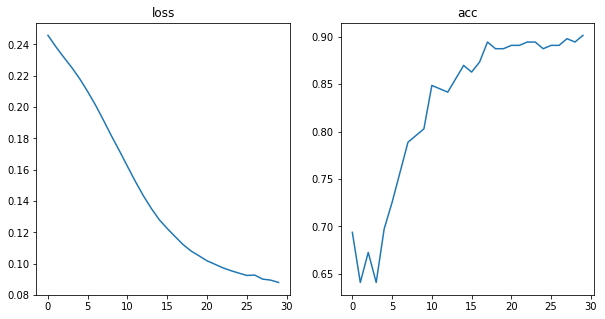

In [21]:
#loss, acc 현황을 그래프로 확인
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(tf_model.history['loss'])
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("acc")
plt.plot(tf_model.history['acc'])
plt.show()

In [13]:
test_data = files.upload()

Saving valid.csv to valid (3).csv


In [0]:
df2 = pd.read_csv('./valid.csv')

In [15]:
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.037310,0.047300,0.015570,0.01318,0.003892,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.34030,0.14180,0.2218,0.07820
1,9112594,B,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,0.2621,1.232,1.657,21.19,0.006054,0.008974,0.005681,0.006336,0.01215,0.001514,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291
2,906539,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,0.06267,0.2864,1.440,2.206,20.30,0.007278,0.020470,0.044470,0.008799,0.01868,0.003339,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
3,9012795,M,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,0.06183,0.3414,1.309,2.407,39.06,0.004426,0.026750,0.034370,0.013430,0.01675,0.004367,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.40240,0.19660,0.2730,0.08666
4,922297,B,13.87,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,0.1620,0.06688,0.2720,1.047,2.076,23.12,0.006298,0.021720,0.026150,0.009061,0.01490,0.003599,15.05,24.75,99.17,688.6,0.1264,0.2037,0.13770,0.06845,0.2249,0.08492


In [0]:
X = df2[['concave points_mean','concavity_mean']].values
Y = df2['diagnosis'].values

for i in range (len(Y)):
  if Y[i] == 'M':
    Y[i] = 1
  else:
    Y[i] = 0

In [0]:
result = model.predict_classes(X)

In [0]:
correct = 0
temp = result == Y
for i in range(len(temp)):
    if(temp[0][i] == True):
        correct += 1

accuracy = correct / len(temp)

In [19]:
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6479
